In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import chisquare

In [26]:
df_dim_patient = pd.read_csv("../../../data/clean_data/model/dim_patient.csv")
df_dim_donor = pd.read_csv("../../../data/clean_data/model/dim_donor.csv")
df_fct_haemodynamic = pd.read_csv("../../../data/clean_data/model/fct_haemodynamic.csv")
df_fct_neurology=pd.read_csv("../../../data/clean_data/model/fct_neurology.csv")
df_fct_respiratory=pd.read_csv("../../../data/clean_data/model/fct_respiratory.csv")
df_fct_temperature=pd.read_csv("../../../data/clean_data/model/fct_temperature.csv")
print("dimension de la table df_dim_patient : ", df_dim_patient.shape)
print("dimension de la table df_dim_donor : ", df_dim_donor.shape)
print("dimension de la table df_fct_haemodynamic : ", df_fct_haemodynamic.shape)
print("dimension de la table df_fct_neurology : ", df_fct_neurology.shape)
print("dimension de la table df_fct_respiratory : ", df_fct_respiratory.shape)
print("dimension de la table df_fct_temperature : ", df_fct_temperature.shape)

dimension de la table df_dim_patient :  (411, 91)
dimension de la table df_dim_donor :  (411, 11)
dimension de la table df_fct_haemodynamic :  (64496, 14)
dimension de la table df_fct_neurology :  (64496, 8)
dimension de la table df_fct_respiratory :  (64496, 19)
dimension de la table df_fct_temperature :  (64496, 4)


In [5]:
df_dim_patient.head()

,id_patient,exclusion_plasmapherese,exclusion_pf,exclusion_ino,exclusion_lactate,date_transplantation,date_sortie_bloc,heure_arrivee_rea,age,sexe,...,pdg_h24,pgd_h48,pgd3,date_de_deces,lactates_initial,lactates_clampage_cote_1,lactates_declampage_cote_1,lactates_clampage_cote_2,lactates_declampage_cote_2,lactates_fermeture
0,1,0,0,0,0,05/01/2012,1/5/12,12:20,49,0,...,1.0,1.0,1.0,NaN,0.5,NaN,2.6,2.3,5.0,NaN
1,2,0,1,0,0,08/01/2012,1/8/12,12:30,42,1,...,0.0,0.0,0.0,NaN,1.3,5.2,5.3,5.0,8.1,5.2
2,3,0,0,0,0,11/01/2012,1/12/12,22:30,22,1,...,1.0,0.0,1.0,NaN,0.7,1.8,2.3,1.6,NaN,3.0
3,4,0,0,0,0,15/01/2012,1/15/12,14:00,57,0,...,0.0,0.0,0.0,2/22/16,0.4,0.8,NaN,0.8,NaN,0.8
4,5,0,0,0,0,17/01/2012,1/18/12,19:04,49,0,...,1.0,1.0,1.0,NaN,2.3,NaN,2.3,2.6,3.3,4.3


In [41]:
moy_ext_immediate = np.mean(df_dim_patient['immediate_extubation'])
print(round(moy_ext_immediate*100, 2), "% des patients se font extuber immédiatement.")

33.41 % des patients se font extuber immédiatement.


In [42]:
moy_second_intub = np.mean(df_dim_patient['secondary_intubation'])
print(round(moy_second_intub*100, 2), "% des patients se font intuber après 1ère extubation.")

12.25 % des patients se font intuber après 1ère extubation.


### Focus sur les patients qui ont subi une extubation immédiate et on été ré-intubé par la suite

In [79]:
secondary_intub_after_immediate_extub =  df_dim_patient[(df_dim_patient['immediate_extubation']==1.0) & (df_dim_patient['secondary_intubation']==1.0)]
print(round(len(secondary_intub_after_immediate_extub)*100/(len(df_dim_patient)),2),"% des patients se font intuber après 1ère extubation IMMEDIATE")

3.89 % des patients se font intuber après 1ère extubation IMMEDIATE


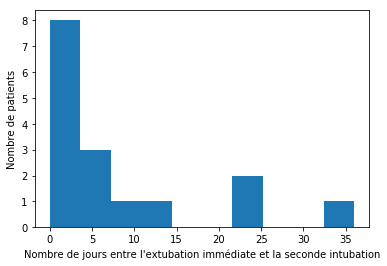

In [78]:
secondary_intub_after_immediate_extub[['immediate_extubation','secondary_intubation', 'time_to_secondary_intubation']]
plt.figure()
#sns.distplot(secondary_intub_after_immediate_extub['time_to_secondary_intubation'], hist=True, kde=False, label='Nombre de patients réintubés (apres un extubation immédiate) = fonction(time_to_secondary_intubation)')# kde : kernel density estimation
plt.hist(secondary_intub_after_immediate_extub['time_to_secondary_intubation'])
plt.xlabel('Nombre de jours entre l\'extubation immédiate et la seconde intubation')
plt.ylabel('Nombre de patients')
plt.show()

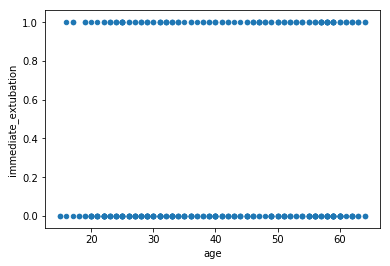

In [80]:
#scatter plot grlivarea/saleprice
var = 'age'
data = pd.concat([df_dim_patient['immediate_extubation'], df_dim_patient[var]], axis=1)
data.plot.scatter(x=var, y='immediate_extubation')

In [28]:
df_dim_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 91 columns):
id_patient                                411 non-null int64
exclusion_plasmapherese                   411 non-null object
exclusion_pf                              411 non-null object
exclusion_ino                             411 non-null object
exclusion_lactate                         411 non-null object
date_transplantation                      410 non-null object
date_sortie_bloc                          411 non-null object
heure_arrivee_rea                         411 non-null object
age                                       411 non-null int64
sexe                                      411 non-null int64
body_mass_index                           411 non-null int64
diabetes                                  411 non-null int64
preoperative_icu                          409 non-null float64
preoperative_vasopressor                  409 non-null float64
preoperative_mechanical_ventil

In [113]:
#list Categorical columns
categorical_variable=['exclusion_plasmapherese','exclusion_pf','exclusion_ino','exclusion_lactate','sexe','diabetes','preoperative_icu','preoperative_vasopressor','preoperative_mechanical_ventilation','super_urgence','other_organ_transplantation','pathologie','retransplant','transplanted_twice_during_study_period','thoracic_surgery_history','preoperative_pulmonary_hypertension','plasmapherese','pfo','exvivo','preoperative_ecmo','postoperative_ecmo','only_intraoperative_ecmo','ecmo_during_surgery','cec','moment_de_pose_ecmo','cause_ecmo','pulmonary_reduction','adrenaline_perop','no_dependence','cause_no_dependance','adre_end_surgery','immediate_extubation','secondary_intubation','secondary_ecmo','cause_ecmo_secondaire','postoperative_vasopressive_support','acfa','cva','hemodyalisis','tracheostomy','reoperation_for_bleeding','bleeding','lower_limb_complication','lower_limb_ischemia','scarpa_complication','vascular_complications','thromboembolic_complication','choc_septique','cardiac_arrest_during_surgery','in_hospital_mortality','30_d_survival','pgd_h0','pgd_end_surgery','pdg_h24','pgd_h48','pgd3']

In [114]:
date_time_variable = ['date_transplantation','date_sortie_bloc','date_de_deces', 'heure_arrivee_rea']

In [115]:
unknown_variable_in_glossary=['p_f_h0', 'p_f_end_surgery','lactates_clampage_cote_1', 'lactates_clampage_cote_2',
       'lactates_declampage_cote_1', 'lactates_declampage_cote_2',
       'lactates_fermeture', 'lactates_initial']

In [223]:
list_var= []
list_var.extend(categorical_variable)
list_var.extend(date_time_variable)
list_var.extend(unknown_variable_in_glossary)
list_var

['exclusion_plasmapherese',
 'exclusion_pf',
 'exclusion_ino',
 'exclusion_lactate',
 'sexe',
 'diabetes',
 'preoperative_icu',
 'preoperative_vasopressor',
 'preoperative_mechanical_ventilation',
 'super_urgence',
 'other_organ_transplantation',
 'pathologie',
 'retransplant',
 'transplanted_twice_during_study_period',
 'thoracic_surgery_history',
 'preoperative_pulmonary_hypertension',
 'plasmapherese',
 'pfo',
 'exvivo',
 'preoperative_ecmo',
 'postoperative_ecmo',
 'only_intraoperative_ecmo',
 'ecmo_during_surgery',
 'cec',
 'moment_de_pose_ecmo',
 'cause_ecmo',
 'pulmonary_reduction',
 'adrenaline_perop',
 'no_dependence',
 'cause_no_dependance',
 'adre_end_surgery',
 'immediate_extubation',
 'secondary_intubation',
 'secondary_ecmo',
 'cause_ecmo_secondaire',
 'postoperative_vasopressive_support',
 'acfa',
 'cva',
 'hemodyalisis',
 'tracheostomy',
 'reoperation_for_bleeding',
 'bleeding',
 'lower_limb_complication',
 'lower_limb_ischemia',
 'scarpa_complication',
 'vascular_compl

In [119]:
#df[df.columns.difference(['b'])]
df_dim_patient[df_dim_patient.columns.difference(list_var)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 23 columns):
age                             411 non-null int64
body_mass_index                 411 non-null int64
delai_recours_ecmo              120 non-null float64
ecmo_duration                   410 non-null float64
estimated_blood_loss            410 non-null object
ffp                             410 non-null float64
ffp.1                           408 non-null float64
first_lung_ischemic_time        407 non-null object
fluid_support                   410 non-null float64
id_patient                      411 non-null int64
los_first_ventilation           410 non-null float64
los_hosp                        408 non-null float64
los_icu                         408 non-null float64
los_total_ventilation           410 non-null float64
nad_end_surgery                 410 non-null object
platelets                       410 non-null float64
platelets.1                     408 non-null float64
prb

# estimated_blood_loss 
- complete missing values (NA, NF) 
- convert to float type

In [182]:
a=df_dim_patient[df_dim_patient['estimated_blood_loss']!="NF"]["estimated_blood_loss"].convert_objects(convert_numeric=True)
a=a[a.notnull()]
estimated_blood_loss_mean =np.mean(a) 

df_dim_patient.loc[df_dim_patient['estimated_blood_loss'] == "NF", ['estimated_blood_loss']] = estimated_blood_loss_mean

df_dim_patient["estimated_blood_loss"] = df_dim_patient["estimated_blood_loss"].convert_objects(convert_numeric=True)
df_dim_patient['estimated_blood_loss']=df_dim_patient[['estimated_blood_loss']].fillna(value=df_dim_patient[['estimated_blood_loss']].mean())


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


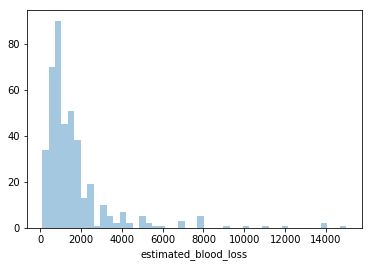

In [187]:
#Distribution de la variable estimated_blood_loss : nb_patient = fct (estimated_blood_loss)
sns.distplot(df_dim_patient['estimated_blood_loss'], hist=True, kde=False)# kde : kernel density estimation

# Etudes des correlations entre les variables réèlles (non cat)

### 1-sans la variable target immediate_extubation, avec correlation pearson (linéarité)

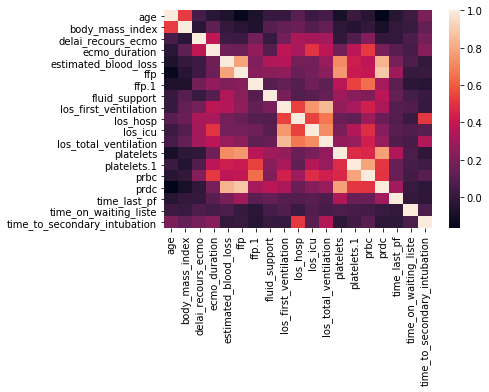

In [193]:
liste_a_exclure = []
liste_a_exclure.extend(list_var)
liste_a_exclure.extend(["id_patient"])
corr = df_dim_patient[df_dim_patient.columns.difference(liste_a_exclure)].corr()#by default pearson
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 2- Avec la variable target, methode pearson

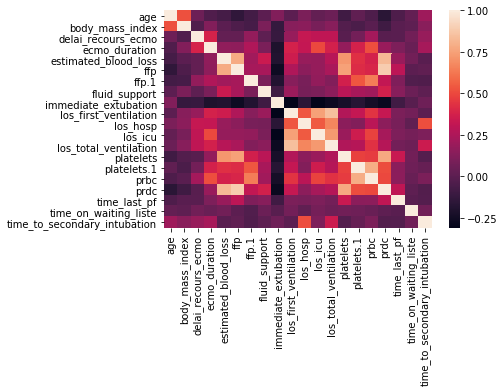

In [198]:
liste_a_exclure_bis = list(filter(lambda x: x!= "immediate_extubation", liste_a_exclure))
corr = df_dim_patient[df_dim_patient.columns.difference(liste_a_exclure_bis)].corr()#by default pearson
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 3- avec la variable target, corrélation spearman (relations non linéaires)

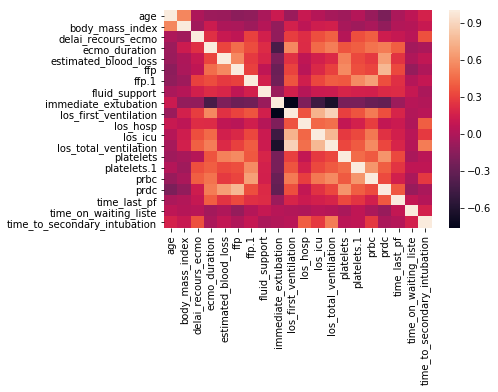

In [199]:
liste_a_exclure_bis = list(filter(lambda x: x!= "immediate_extubation", liste_a_exclure))
corr = df_dim_patient[df_dim_patient.columns.difference(liste_a_exclure_bis)].corr(method='spearman')#by default pearson
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



# Etude des indépendances entre les variables catégorielles

In [218]:
df_dim_patient[categorical_values].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,exclusion_pf,exclusion_ino,exclusion_lactate,sexe,diabetes,preoperative_icu,preoperative_vasopressor,preoperative_mechanical_ventilation,super_urgence,other_organ_transplantation,...,thromboembolic_complication,choc_septique,cardiac_arrest_during_surgery,in_hospital_mortality,30_d_survival,pgd_h0,pgd_end_surgery,pdg_h24,pgd_h48,pgd3
exclusion_pf,1.000000,0.766448,0.479114,-0.008826,0.006675,0.073827,0.031004,0.024186,0.166349,0.217679,...,-0.080444,0.014277,-0.110986,-0.083257,-0.038170,0.160097,-0.100729,0.099963,0.088691,0.055059
exclusion_ino,0.766448,1.000000,0.432323,0.002162,-0.005080,0.039039,0.029123,0.016619,0.101923,0.182298,...,0.043438,-0.081823,0.040724,0.041208,0.083548,-0.023244,0.015820,-0.152478,-0.128632,-0.226712
exclusion_lactate,0.479114,0.432323,1.000000,-0.052584,0.109427,0.312434,0.192148,0.196721,0.437616,0.444332,...,0.051036,-0.152648,-0.075370,-0.046801,-0.073621,-0.141828,0.004635,-0.364160,-0.357061,-0.291278
sexe,-0.008826,0.002162,-0.052584,1.000000,-0.031978,-0.040155,0.026031,-0.056159,-0.059150,0.040452,...,-0.037110,-0.081764,0.035045,0.035791,0.021160,0.040052,0.005529,0.086766,0.062797,0.054615
diabetes,0.006675,-0.005080,0.109427,-0.031978,1.000000,0.023901,0.034863,0.009069,0.063230,0.133701,...,0.004431,0.060798,0.019919,0.050117,0.081511,0.021593,0.095879,-0.026151,-0.025474,0.002803
preoperative_icu,0.073827,0.039039,0.312434,-0.040155,0.023901,1.000000,0.494453,0.543970,0.777602,0.050477,...,0.066333,0.023406,0.002595,0.083238,0.103002,-0.277119,-0.003486,-0.083975,-0.089487,-0.116097
preoperative_vasopressor,0.031004,0.029123,0.192148,0.026031,0.034863,0.494453,1.000000,0.562692,0.421479,0.053288,...,0.106375,-0.007289,0.045208,0.092341,0.122082,-0.195781,-0.004839,-0.060170,-0.062573,-0.074250
preoperative_mechanical_ventilation,0.024186,0.016619,0.196721,-0.056159,0.009069,0.543970,0.562692,1.000000,0.412343,0.005932,...,0.108759,0.090139,0.032508,0.156344,0.198703,-0.189388,0.047161,-0.097934,-0.100803,-0.091343
super_urgence,0.166349,0.101923,0.437616,-0.059150,0.063230,0.777602,0.421479,0.412343,1.000000,0.109881,...,0.049895,-0.008464,0.037244,0.071098,0.086367,-0.243613,-0.005265,-0.145328,-0.151040,-0.163017
other_organ_transplantation,0.217679,0.182298,0.444332,0.040452,0.133701,0.050477,0.053288,0.005932,0.109881,1.000000,...,-0.012038,-0.013247,0.032202,0.063346,0.091378,-0.018060,-0.017804,-0.144050,-0.147197,-0.114677


In [220]:
df=df_dim_patient.apply(lambda x : pd.factorize(x)[0])+1

pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.000000,2.130097e+07,1.577137e+07,1.352215e+07,2.130097e+07,inf,36.542706,442404.417951,1.891196e+06,17263648.5,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,83743.741057,0.000000e+00,5.750000e+01,7.250000e+01,0.000000e+00,inf,82095.777059,45630.762145,8.243329e+03,125.5,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,83528.347213,1.120000e+02,0.000000e+00,3.000000e+01,1.120000e+02,inf,81880.405580,45422.065057,8.056441e+03,149.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,83455.114867,1.450000e+02,4.800000e+01,0.000000e+00,1.450000e+02,inf,81807.181359,45350.885806,7.991709e+03,156.5,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,83743.741057,0.000000e+00,5.750000e+01,7.250000e+01,0.000000e+00,inf,82095.777059,45630.762145,8.243329e+03,125.5,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
5,433.870421,2.044113e+07,1.504282e+07,1.295584e+07,2.044113e+07,NaN,399.118016,424843.351685,1.813162e+06,16550374.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35.723239,2.039354e+07,1.511080e+07,1.296621e+07,2.039354e+07,inf,0.000000,421916.232309,1.809810e+06,16526042.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
7,22022.153288,7.147270e+06,5.371442e+06,4.633430e+06,7.147270e+06,inf,20939.584580,0.000000,5.674104e+05,5666221.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
8,68316.120066,2.386872e+05,1.980127e+05,1.817722e+05,2.386872e+05,inf,66687.010124,36054.466447,0.000000e+00,188313.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
9,83451.667005,1.971667e+02,1.661667e+02,1.556667e+02,1.971667e+02,inf,81803.729762,45349.443529,7.985371e+03,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


# Compléter les données réèlles (non cat)

In [222]:
# first_lung_ischemic_time   et second_lung_ischemic_time
a=df_dim_patient[df_dim_patient['first_lung_ischemic_time']!="NF"]["first_lung_ischemic_time"].convert_objects(convert_numeric=True)
a=a[a.notnull()]
first_lung_ischemic_time_mean =np.mean(a) 

df_dim_patient.loc[df_dim_patient['first_lung_ischemic_time'] == "NF", ['first_lung_ischemic_time']] = first_lung_ischemic_time_mean

df_dim_patient["first_lung_ischemic_time"] = df_dim_patient["first_lung_ischemic_time"].convert_objects(convert_numeric=True)
df_dim_patient['first_lung_ischemic_time']=df_dim_patient[['first_lung_ischemic_time']].fillna(value=df_dim_patient[['first_lung_ischemic_time']].mean())



a=df_dim_patient[df_dim_patient['second_lung_ischemic_time']!="NF"]["second_lung_ischemic_time"].convert_objects(convert_numeric=True)
a=a[a.notnull()]
second_lung_ischemic_time_mean =np.mean(a) 

df_dim_patient.loc[df_dim_patient['second_lung_ischemic_time'] == "NF", ['second_lung_ischemic_time']] = second_lung_ischemic_time_mean

df_dim_patient["second_lung_ischemic_time"] = df_dim_patient["second_lung_ischemic_time"].convert_objects(convert_numeric=True)
df_dim_patient['second_lung_ischemic_time']=df_dim_patient[['second_lung_ischemic_time']].fillna(value=df_dim_patient[['second_lung_ischemic_time']].mean())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Fut

In [225]:
#nad_end_surgery
a=df_dim_patient[df_dim_patient['nad_end_surgery']!="#VALEUR!"]["nad_end_surgery"].convert_objects(convert_numeric=True)
a=a[a.notnull()]
nad_end_surgery_mean =np.mean(a) 

df_dim_patient.loc[df_dim_patient['nad_end_surgery'] == "#VALEUR!", ['nad_end_surgery']] = second_lung_ischemic_time_mean

df_dim_patient["nad_end_surgery"] = df_dim_patient["nad_end_surgery"].convert_objects(convert_numeric=True)
df_dim_patient['nad_end_surgery']=df_dim_patient[['nad_end_surgery']].fillna(value=df_dim_patient[['nad_end_surgery']].mean())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


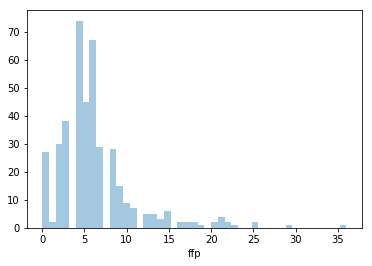

In [229]:
sns.distplot(df_dim_patient['ffp'].dropna(), hist=True, kde=False)# kde : kernel density estimation

In [230]:
df_dim_patient['ffp']=df_dim_patient[['ffp']].fillna(value=df_dim_patient[['ffp']].mean())
df_dim_patient['ffp.1']=df_dim_patient[['ffp.1']].fillna(value=df_dim_patient[['ffp.1']].mean())

In [236]:
df_dim_patient['los_first_ventilation']=df_dim_patient[['los_first_ventilation']].fillna(value=df_dim_patient[['los_first_ventilation']].mean())
df_dim_patient['los_hosp']=df_dim_patient[['los_hosp']].fillna(value=df_dim_patient[['los_hosp']].mean())
df_dim_patient['los_icu']=df_dim_patient[['los_icu']].fillna(value=df_dim_patient[['los_icu']].mean())
df_dim_patient['los_total_ventilation']=df_dim_patient[['los_total_ventilation']].fillna(value=df_dim_patient[['los_total_ventilation']].mean())

In [243]:
df_dim_patient['platelets']=df_dim_patient[['platelets']].fillna(value=df_dim_patient[['platelets']].mean())
df_dim_patient['platelets.1']=df_dim_patient[['platelets.1']].fillna(value=df_dim_patient[['platelets.1']].mean())
df_dim_patient['prbc']=df_dim_patient[['prbc']].fillna(value=df_dim_patient[['prbc']].mean())
df_dim_patient['prdc']=df_dim_patient[['prdc']].fillna(value=df_dim_patient[['prdc']].mean())
df_dim_patient['time_last_pf']=df_dim_patient[['time_last_pf']].fillna(value=df_dim_patient[['time_last_pf']].mean())
df_dim_patient['fluid_support']=df_dim_patient[['fluid_support']].fillna(value=df_dim_patient[['fluid_support']].mean())

In [244]:
df_dim_patient[df_dim_patient.columns.difference(list_var)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 23 columns):
age                             411 non-null int64
body_mass_index                 411 non-null int64
delai_recours_ecmo              120 non-null float64
ecmo_duration                   410 non-null float64
estimated_blood_loss            411 non-null float64
ffp                             411 non-null float64
ffp.1                           411 non-null float64
first_lung_ischemic_time        411 non-null float64
fluid_support                   411 non-null float64
id_patient                      411 non-null int64
los_first_ventilation           411 non-null float64
los_hosp                        411 non-null float64
los_icu                         411 non-null float64
los_total_ventilation           411 non-null float64
nad_end_surgery                 411 non-null float64
platelets                       411 non-null float64
platelets.1                     411 non-null float64
